In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("/content/drive/MyDrive/Datasets/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
1,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
3,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
4,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800


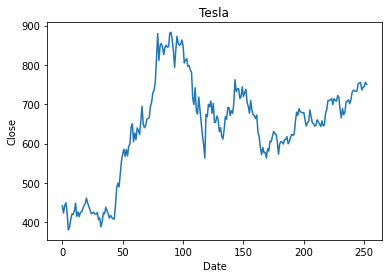

In [11]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [12]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [13]:
data = data.rename(columns={"Date": "ds", "Close" : "y"})

In [14]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods =365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
613,2022-09-12,1143.795894,349.664026,1941.899291
614,2022-09-13,1149.074985,337.967704,1964.836565
615,2022-09-14,1149.424380,346.774386,1955.638445
616,2022-09-15,1150.301360,337.017465,1970.674891
617,2022-09-16,1151.687783,333.032529,1972.812353


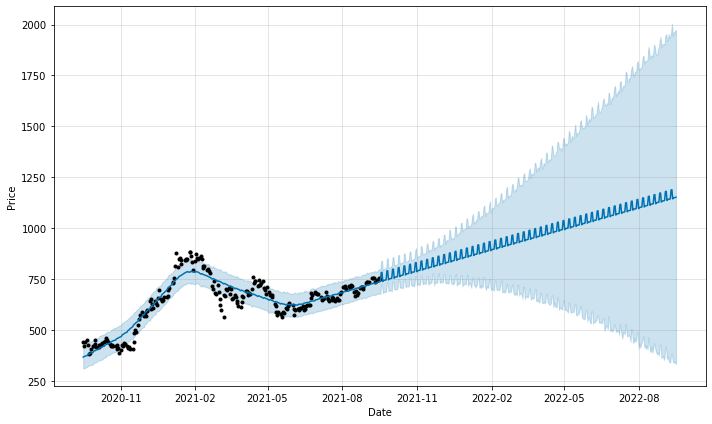

In [15]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")